In [6]:
import os
os.environ['KAGGLE_USERNAME'] =''
os.environ['KAGGLE_KEY'] = ''

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:12<00:00, 247MB/s]
100% 2.70G/2.70G [00:12<00:00, 241MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

In [9]:
#Data is already split into train, test and valid sets on download. Merging all
#into folder to perform split sets by ourselves.

import os
import shutil

dataset_path_1 = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
dataset_path_2 = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

merge_path = '/content/PlantDiseases'

if not os.path.exists(merge_path):
    os.makedirs(merge_path)


for cls in os.listdir(dataset_path_1):
  os.makedirs(os.path.join(merge_path, cls))

  for img in os.listdir(os.path.join(dataset_path_1,cls)):
        src_path = os.path.join(dataset_path_1, cls, img)
        dst_path = os.path.join(merge_path, cls, img)
        shutil.copyfile(src_path, dst_path)

  for img in os.listdir(os.path.join(dataset_path_2,cls)):
        src_path = os.path.join(dataset_path_2, cls, img)
        dst_path = os.path.join(merge_path, cls, img)
        shutil.copyfile(src_path, dst_path)


In [10]:
dir_path = '/content/PlantDiseases'

for dir in os.listdir(dir_path):
    if dir not in ('Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Raspberry___healthy', 'Soybean___healthy'):
        shutil.rmtree(os.path.join(dir_path, dir))


In [11]:
#Splitting the data
import os
import shutil
import random

# The path to our dataset
dataset_path = '/content/PlantDiseases'

# Defining the ratio for splitting the dataset
train_ratio = 0.75
valid_ratio = 0.10
test_ratio = 0.15

# The path to the output directory
output_path = '/content/PlantDiseases_split_data'

# Creating the output directory if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Defining the names of the subdirectories for each set
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# Create the subdirectories for each set
os.makedirs(os.path.join(output_path, train_dir))
os.makedirs(os.path.join(output_path, valid_dir))
os.makedirs(os.path.join(output_path, test_dir))

# Loop over each class in the dataset
classes = os.listdir(dataset_path)
for cls in classes:
    # Create the subdirectories for each class in each set
    os.makedirs(os.path.join(output_path, train_dir, cls))
    os.makedirs(os.path.join(output_path, valid_dir, cls))
    os.makedirs(os.path.join(output_path, test_dir, cls))

    # Get the list of images for this class
    images = os.listdir(os.path.join(dataset_path, cls))
    num_images = len(images)

    # Shuffle the images
    random.shuffle(images)

    # Split the images into sets
    num_train = int(train_ratio * num_images)
    num_valid = int(valid_ratio * num_images)
    num_test = int(test_ratio * num_images)

    train_images = images[:num_train]
    valid_images = images[num_train:num_train+num_valid]
    test_images = images[num_train+num_valid:]

    # Copy the images to the corresponding subdirectories for each set
    for img in train_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, train_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in valid_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, valid_dir, cls, img)
        shutil.copyfile(src_path, dst_path)

    for img in test_images:
        src_path = os.path.join(dataset_path, cls, img)
        dst_path = os.path.join(output_path, test_dir, cls, img)
        shutil.copyfile(src_path, dst_path)


In [12]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm


# The transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to 224x224
    transforms.ToTensor(),         # Convert the images to PyTorch tensors
    transforms.Normalize(          # Normalize the images
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Loading the dataset
train_dataset = ImageFolder('/content/PlantDiseases_split_data/train', transform=transform)
test_dataset = ImageFolder('/content/PlantDiseases_split_data/test', transform=transform)
val_dataset = ImageFolder('/content/PlantDiseases_split_data/validation', transform=transform)

# Creating data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


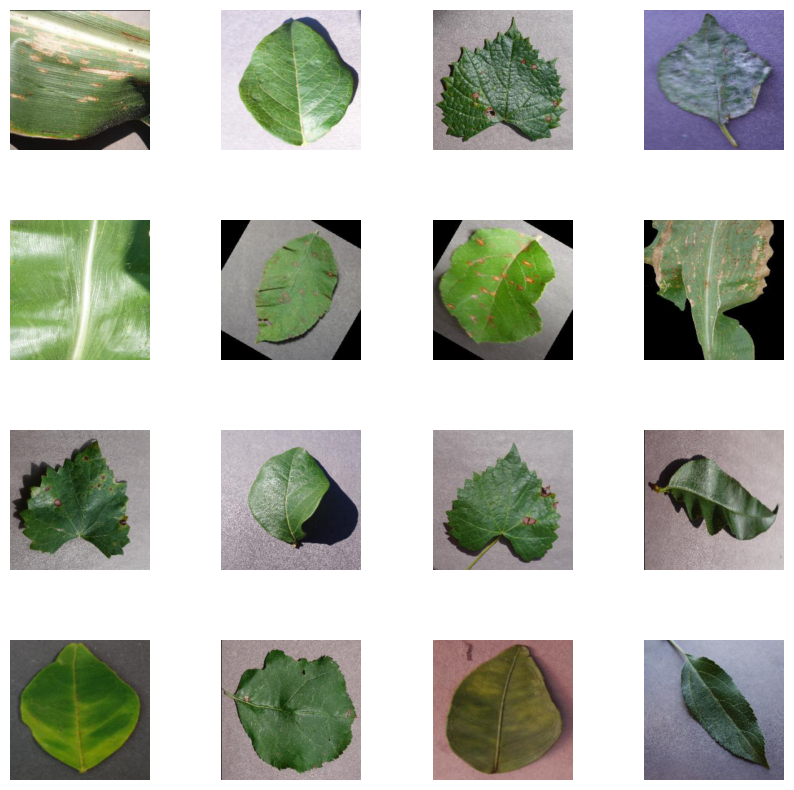

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Get a batch of images from the train loader
images, labels = next(iter(train_loader))

# Convert the PyTorch tensor to a NumPy array
images = images.numpy()

# Convert the NumPy array to a PyTorch tensor
images = torch.from_numpy(images)

# Denormalize the images
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
images = images.permute(0, 2, 3, 1)  # Change the order of the dimensions
images = std * images + mean

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust subplot parameters
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i])
    ax.axis('off')
plt.show()

In [14]:
# Defining the model architecture
model = models.shufflenet_v2_x2_0(weights=None)
model.classifier = nn.Sequential(
    nn.Linear(1280, 512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512, 20)
)

# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Defining the number of epochs to train for
num_epochs = 15


In [23]:
# initializing the model and loading the saved state
model.load_state_dict(torch.load('ShuffleNet\ShuffleNet_Dataset_2\best_model.pt'))
model.eval()

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 122, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(122, eps=1e-05, momentum=0.1, affine=True, track_runn

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the device
model = model.to(device)

class_names= test_dataset.classes
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000','#7FFF00','#8B4513','#8B8878','#8B6508','#68228B']



# Extract the features from the model
features = []
labels = []
with torch.no_grad():
    for images, batch_labels in test_loader:
        images, batch_labels = images.to(device), batch_labels.to(device)
        outputs = model(images)
        features.append(outputs.cpu().detach().numpy())
        labels.append(batch_labels.cpu().numpy())
features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# Compute the t-SNE embeddings
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=1000)
embeddings = tsne.fit_transform(features)

# Cluster the embeddings using KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(embeddings)


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 6950 samples in 0.003s...
[t-SNE] Computed neighbors for 6950 samples in 3.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6950
[t-SNE] Computed conditional probabilities for sample 2000 / 6950
[t-SNE] Computed conditional probabilities for sample 3000 / 6950
[t-SNE] Computed conditional probabilities for sample 4000 / 6950
[t-SNE] Computed conditional probabilities for sample 5000 / 6950
[t-SNE] Computed conditional probabilities for sample 6000 / 6950
[t-SNE] Computed conditional probabilities for sample 6950 / 6950
[t-SNE] Mean sigma: 15.152703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.380630
[t-SNE] KL divergence after 1000 iterations: 0.808870


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


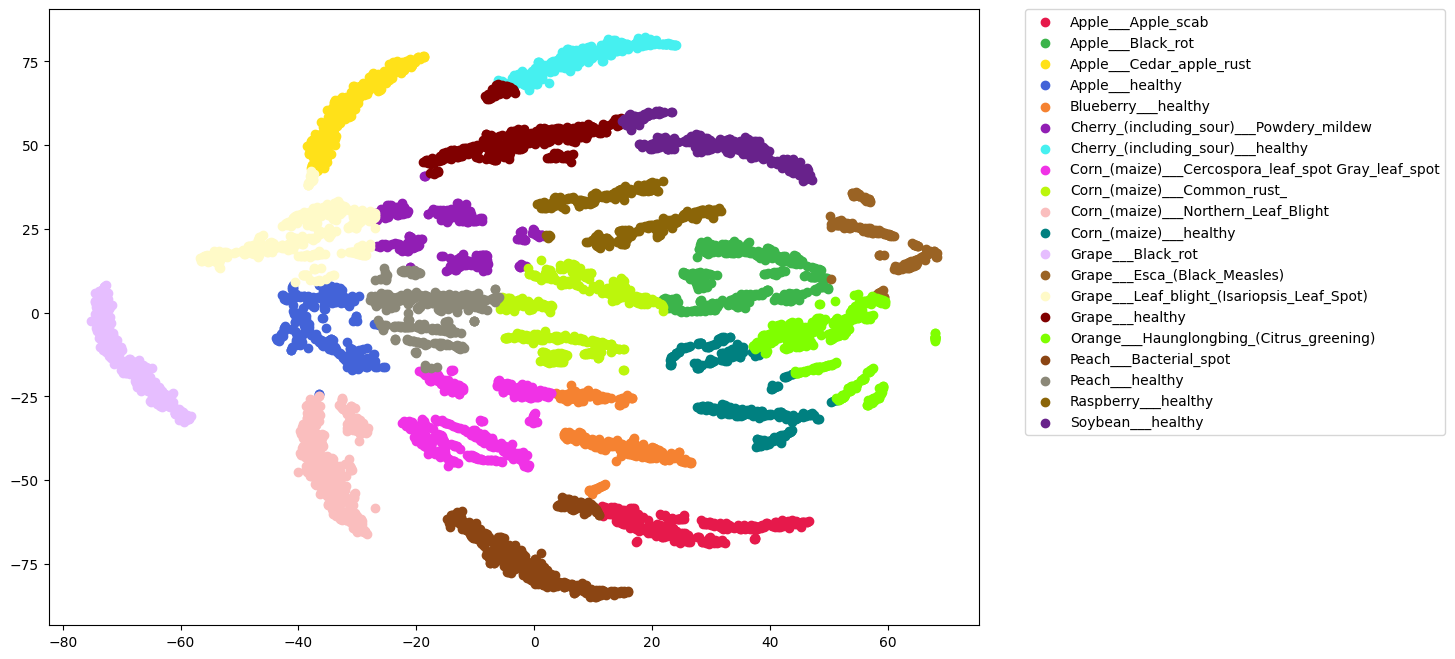

In [30]:
# Plot the t-SNE embeddings with different colors for each cluster
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(class_names)):
    indices = np.where(kmeans.labels_ == i)[0]
    ax.scatter(embeddings[indices, 0], embeddings[indices, 1], label=class_names[i], c=colors[i])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 10})
plt.show()